## Importación de Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima, ARIMA


## Importación de Data y Corrección de fechas

In [2]:
df = pd.read_csv('../data/ts-sample/data.csv')
# solo necesario porque la fecha no está bien definida
df['Month'] = pd.to_datetime('190'+df['Month'].astype('str'), format='%Y-%m')
df.set_index('Month', inplace=True)

## Data Split Utilizamos 80% para entrenar y el resto para validar.


In [3]:
train = df[:int(len(df)*0.8)]
test = df[int(len(df)*0.8):]
TEST_SIZE = len(test)
train.shape,test.shape, TEST_SIZE

((28, 1), (8, 1), 8)

## Visualización de los datos de Entrenamiento y Validación

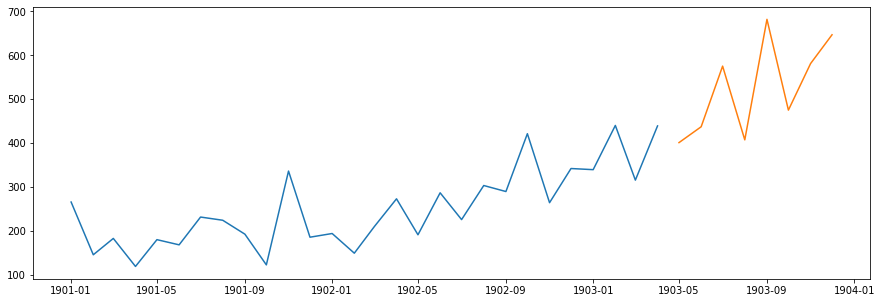

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train)
ax.plot(test);

## Entrenamiento del Modelo

In [12]:
model = auto_arima(train, start_p=1, start_q=1,
                    test='adf',
                    max_p=5, max_q=5,
                    m=1,             
                    d=1,          
                    seasonal=False,   
                    start_P=0, 
                    D=None, 
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=306.733, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=324.422, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=309.076, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322.555, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=308.566, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=306.710, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=307.939, Time=0.02 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.528 seconds


In [6]:
model.summary()
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
prediction


array([385.05946668, 411.06845939, 419.26005586, 427.45165232,
       435.64324878, 443.83484524, 452.0264417 , 460.21803816])

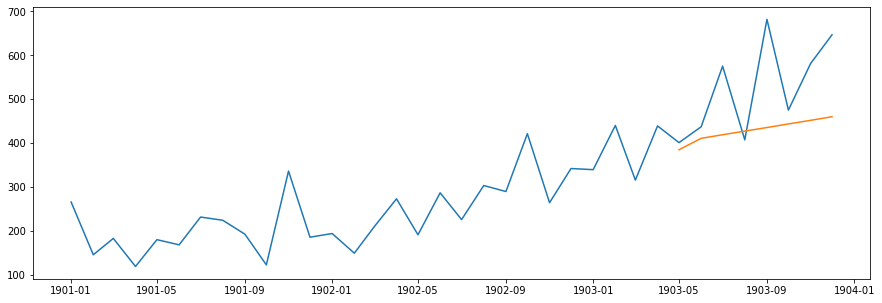

In [7]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series);

## Forecast entrenando con toda la Data

In [8]:
best_params = model.get_params()
new_model = ARIMA(**best_params)
new_model.fit(df)
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)


In [9]:
## se debe modificar esto de manera acorde a los periodos a predecir...
INDEX = pd.date_range(start='1904-01-01', periods=TEST_SIZE, freq='MS', normalize=True)
prediction_series = pd.Series(prediction,index=INDEX, name = 'Sales')
prediction_series.to_frame()

data = pd.concat([df, prediction_series.to_frame()]).iloc[:len(df)+1]

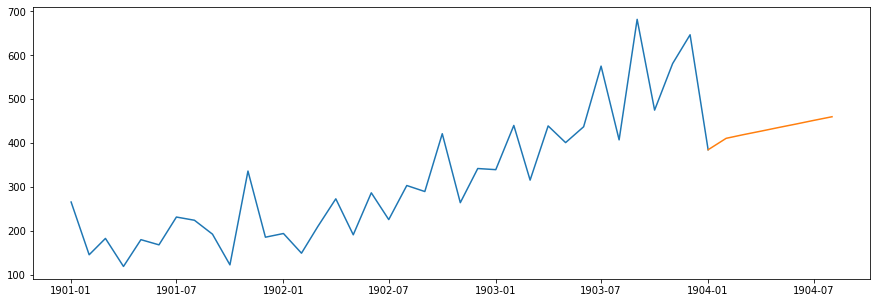

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data)
ax.plot(prediction_series);